# **Graduate Rotational Internship Program (GRIP)** 

## Author: Dipankar Medhi

### **Importing the required libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### **Downloading the data from the given URL**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [ ]:
df.shape

(25, 2)

In [ ]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Our dataset has two features **Hours** and **Scores**. The Scores is the dependent variable and the Hours is the independent variable.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### **Exploratory Data Analysis**

#### Let's plot the dataset and see if there is any kind of relationship between the data.

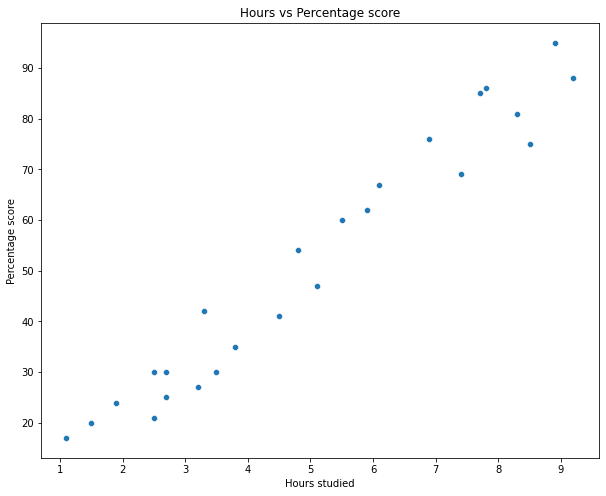

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Hours', y='Scores', data=df)
plt.title('Hours vs Percentage score')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

#### From the graph, we can clearly see that there is a **positive** linear relationship between the number of hours studied and percentage of score.

### **Data Preprocessing**

#### Now we divide the dataset into two variables X and y.The X data set contain the dependent variable and y contain the target varible.

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [ ]:
print("The shape of X is", X.shape)
print("The shape of y is", y.shape)

The shape of X is (25, 1)
The shape of y is (25,)


Now let's split the data into training and test sets using **train_test_split()** method from the Scikit-Learn library.

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Model training and Evaluation**

Now that we have our training and test sets, it is time to train our data

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

print("Training complete")

Training complete


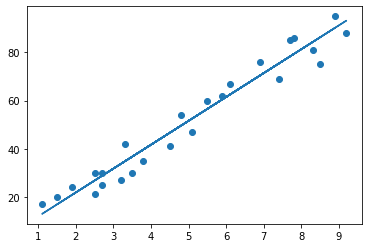

In [ ]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Now that we have trained our model, it's time to make predictions.

In [ ]:
y_pred = reg.predict(X_test)
final_df = pd.DataFrame({"Actual value": y_test, "Predicted value": y_pred})
final_df

,Actual value,Predicted value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
hours = [[9.25]]
predicted_value = reg.predict(hours)
print("No of hours = {}".format(hours[0][0]))
print("Predicted score = {}".format(predicted_value[0]))

No of hours = 9.25
Predicted score = 93.69173248737539


The final step is to evaluate the performance of algorithm. It is important to compare how well different algorithms perform on a particular dataset. 
Here we have chosen the mean squared error metrics but we can also choose the root mean squared error metrics.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


In [ ]:
print("Coefficient of determination: ",metrics.r2_score(y_test, y_pred))

Coefficient of determination:  0.9454906892105354


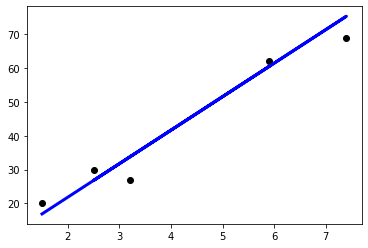

In [ ]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()